In [136]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [137]:
# read train and test data
train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [138]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')

<h1>overview of data</h1>

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [143]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [145]:
train.drop(columns=['PassengerId'],inplace=True)
test_passenger_id=test['PassengerId']
test.drop(columns=['PassengerId'],inplace=True)

In [146]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
numerical_feature_names=['Age','Fare']
categorical_feature_names=['Pclass','SibSp','Parch','Sex','Embarked']
# numerical_feature_names=numerical_feature_names.values
# non_numerical_feature_names=list(filter(lambda x: x not in numerical_feature_names,train.columns))
print(f'numerical_features: {numerical_feature_names}')
print(f'non numerical_features: {categorical_feature_names}')

numerical_features: ['Age', 'Fare']
non numerical_features: ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']


In [148]:
def bar_plot(label_name,data):
    feature=data[label_name]
    count_feature=feature.value_counts()

    plt.bar(count_feature.index,count_feature.values)
    plt.ylabel('Frequency')
    plt.title(label_name)
    plt.show()

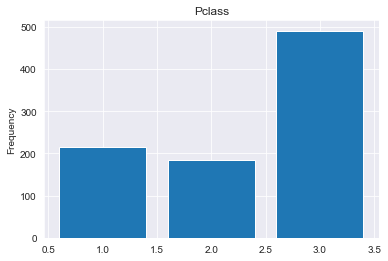

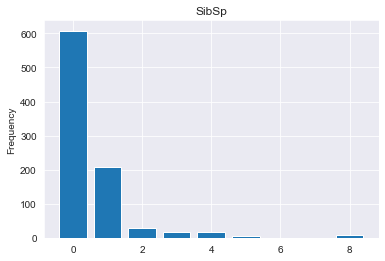

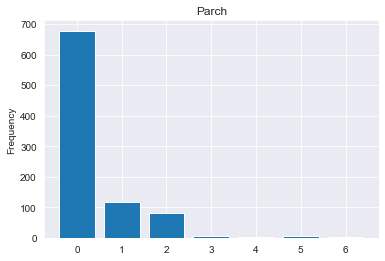

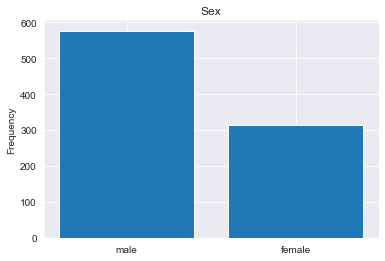

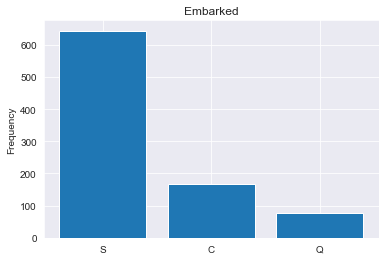

In [149]:
for label in categorical_feature_names:
    bar_plot(label,train)

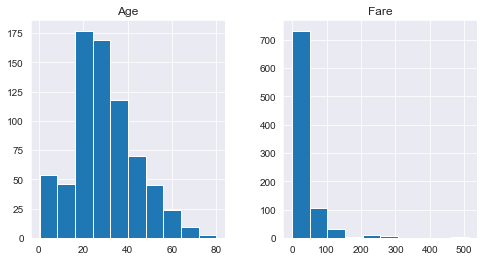

In [150]:
train[numerical_feature_names].hist(figsize=(8,4))
plt.show()

In [151]:
train.groupby(by=['Sex'],as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [152]:
train.groupby(by=['Pclass'],as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [153]:
train.groupby(by=['SibSp'],as_index = False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [154]:
train.groupby(by=['Parch'],as_index = False)['Survived'].mean()


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [155]:
def anomaly_detector(data):
    IQR_outliers=iqr_outlier_detector(data)
    zscore_outliers=zscore_outlier_detector(data)
    columns=[]
    for i in range(len(zscore_outliers.columns)):
        columns.append(IQR_outliers.columns[i])
        columns.append(zscore_outliers.columns[i])
    result=pd.DataFrame(columns=columns)
    result[IQR_outliers.columns]=IQR_outliers.values
    result[zscore_outliers.columns]=zscore_outliers.values
    return result


def iqr_outlier_detector(data):
    columns=data.columns
    columns=list(map(lambda x: 'IQR_method_'+x,columns))
    # calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # calculate the IQR
    IQR = Q3 - Q1

    # filter the dataset with the IQR
    IQR_outliers = (data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
    IQR_outliers.columns=columns
    return IQR_outliers

def zscore_outlier_detector(data):
    columns=data.columns
    columns=list(map(lambda x: 'zscore_method_'+x,columns))
    data=(data-data.mean(axis=0))/data.std(axis=0)
    zscore_outliers= data >= 3
    zscore_outliers.columns=columns
    return zscore_outliers

In [156]:
train=train.loc[(anomaly_detector(train[["Age","SibSp","Parch","Fare"]]).sum(axis=1)<=2)]

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  848 non-null    int64  
 1   Pclass    848 non-null    int64  
 2   Name      848 non-null    object 
 3   Sex       848 non-null    object 
 4   Age       678 non-null    float64
 5   SibSp     848 non-null    int64  
 6   Parch     848 non-null    int64  
 7   Ticket    848 non-null    object 
 8   Fare      848 non-null    float64
 9   Cabin     191 non-null    object 
 10  Embarked  846 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 79.5+ KB


In [158]:
from sklearn.base import BaseEstimator  ,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

In [159]:
class MissingValuesManagement(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.mode_manager_ = None
        self.mode_features=['Pclass', 'SibSp', 'Parch','Fare', 'Sex', 'Embarked']
        self.k_neighbor_features=['Age']
        self.not_defined_features=['Cabin']
        self.k_neighbor_manager_=[]

    def transform(self,X, y=None):
        # mode impute
        X[self.mode_features]=self.mode_manager_.transform(X[self.mode_features])
        # k neighbors impute
        for i,feature in enumerate(self.k_neighbor_features):
            results=self.k_neighbor_manager_[i]['model'].predict(X[self.k_neighbor_manager_[i]['predictors']])
            X[feature]=list(map(lambda x,y:x if not  np.isnan(x) else y,X[feature],results))

        for feature in self.not_defined_features:
            X[feature].fillna(value='not defined',inplace=True)
        return X

    def fit(self,X, y=None, **fit_params):
        # mode manager
        self.mode_manager_=SimpleImputer(strategy='most_frequent')
        self.mode_manager_.fit(X[self.mode_features])

        #k_neighbor manager
        corr_matrix=X.corr()
        for feature in self.k_neighbor_features:
            labels=corr_matrix[feature].sort_values(ascending=False).drop(['Survived'])[:4].index
            predictors=X[labels].dropna()[labels[1:]]
            target=X[labels].dropna()[labels[0]]
            model=KNeighborsRegressor(n_neighbors=min(5,len(predictors)-1))
            model.fit(predictors,target)
            self.k_neighbor_manager_.append({'label':feature,'predictors':labels[1:],'model':model})

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y=None, **fit_params)
        return self.transform(X,y)

In [160]:
imputer=MissingValuesManagement()
imputer.fit(train)
imputer.transform(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,not defined,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,not defined,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,not defined,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,not defined,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.8,1,2,W./C. 6607,23.45,not defined,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


In [161]:
imputer.transform(test)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,not defined,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,not defined,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,not defined,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,not defined,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,not defined,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.1,0,0,A.5. 3236,8.05,not defined,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,not defined,S
416,3,"Ware, Mr. Frederick",male,30.1,0,0,359309,8.05,not defined,S


In [162]:
train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  848 non-null    int64  
 1   Pclass    848 non-null    object 
 2   Name      848 non-null    object 
 3   Sex       848 non-null    object 
 4   Age       848 non-null    float64
 5   SibSp     848 non-null    object 
 6   Parch     848 non-null    object 
 7   Ticket    848 non-null    object 
 8   Fare      848 non-null    object 
 9   Cabin     848 non-null    object 
 10  Embarked  848 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 79.5+ KB


In [164]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,not defined,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,not defined,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,not defined,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,not defined,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.8,1,2,W./C. 6607,23.45,not defined,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler=StandardScaler()
train[numerical_feature_names]=scaler.fit_transform(train[numerical_feature_names])

In [167]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,-0.648565,1,0,A/5 21171,-0.515108,not defined,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.588579,1,0,PC 17599,1.042104,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,-0.339279,0,0,STON/O2. 3101282,-0.498693,not defined,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.356615,1,0,113803,0.599908,C123,S
4,0,3,"Allen, Mr. William Henry",male,0.356615,0,0,373450,-0.495653,not defined,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,-0.261957,0,0,211536,-0.375275,not defined,S
887,1,1,"Graham, Miss. Margaret Edith",female,-0.880530,0,0,112053,0.038144,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.277422,1,2,W./C. 6607,-0.121144,not defined,S
889,1,1,"Behr, Mr. Karl Howell",male,-0.339279,0,0,111369,0.038144,C148,C


In [168]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [169]:
encoder=OrdinalEncoder()
train[categorical_feature_names]=encoder.fit_transform(train[categorical_feature_names])
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2.0,"Braund, Mr. Owen Harris",1.0,-0.648565,1.0,0.0,A/5 21171,-0.515108,not defined,2.0
1,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,0.588579,1.0,0.0,PC 17599,1.042104,C85,0.0
2,1,2.0,"Heikkinen, Miss. Laina",0.0,-0.339279,0.0,0.0,STON/O2. 3101282,-0.498693,not defined,2.0
3,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,0.356615,1.0,0.0,113803,0.599908,C123,2.0
4,0,2.0,"Allen, Mr. William Henry",1.0,0.356615,0.0,0.0,373450,-0.495653,not defined,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1.0,"Montvila, Rev. Juozas",1.0,-0.261957,0.0,0.0,211536,-0.375275,not defined,2.0
887,1,0.0,"Graham, Miss. Margaret Edith",0.0,-0.880530,0.0,0.0,112053,0.038144,B42,2.0
888,0,2.0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,-0.277422,1.0,2.0,W./C. 6607,-0.121144,not defined,2.0
889,1,0.0,"Behr, Mr. Karl Howell",1.0,-0.339279,0.0,0.0,111369,0.038144,C148,0.0


In [170]:
import seaborn as sns

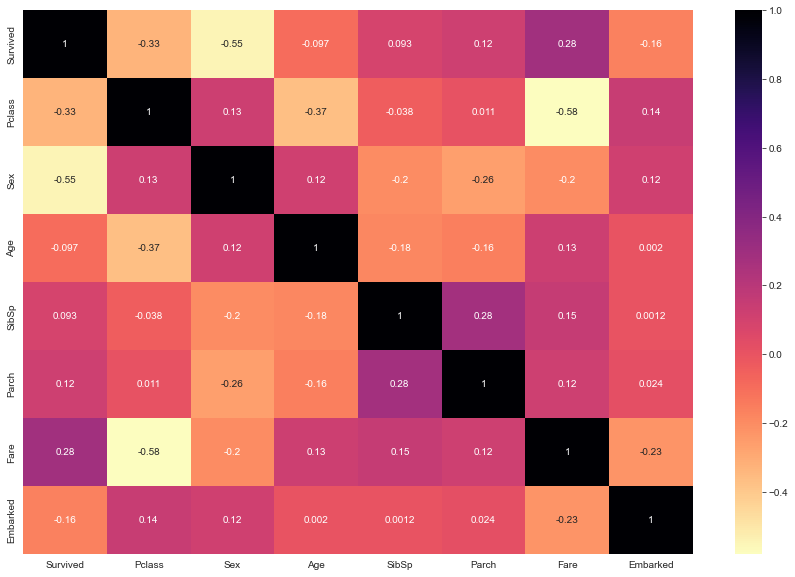

In [171]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.magma_r)
plt.show()

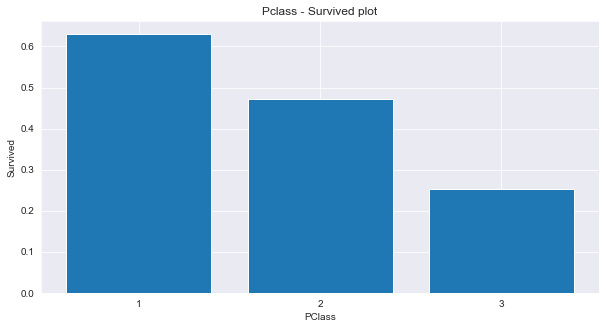

In [172]:
data=train.groupby(by=['Pclass'])['Survived'].sum()/train['Pclass'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(data.index,data.values)
plt.xlabel('PClass')
plt.ylabel('Survived')
plt.title('Pclass - Survived plot')
plt.xticks(ticks=[0,1,2],labels=[1,2,3])
plt.show()

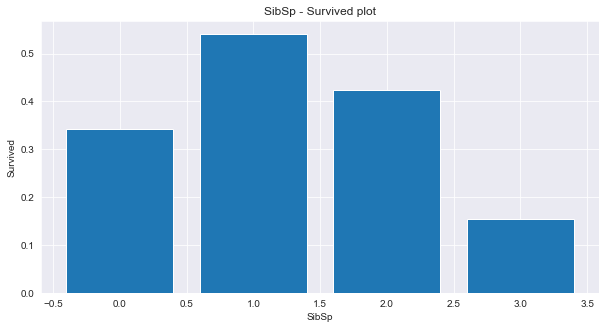

In [173]:
data=train.groupby(by=['SibSp'])['Survived'].sum()/train['SibSp'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(data.index,data.values)
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.title('SibSp - Survived plot')
plt.show()

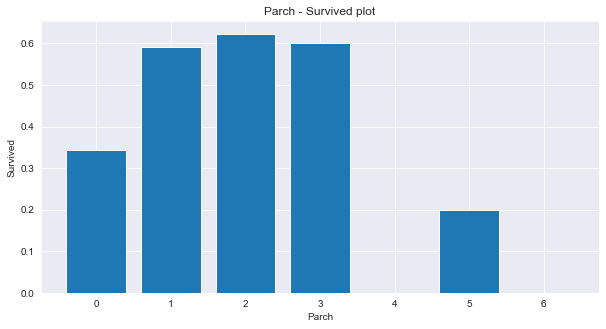

In [174]:
data=train.groupby(by=['Parch'])['Survived'].sum()/train['Parch'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(data.index,data.values)
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.title('Parch - Survived plot')
plt.show()

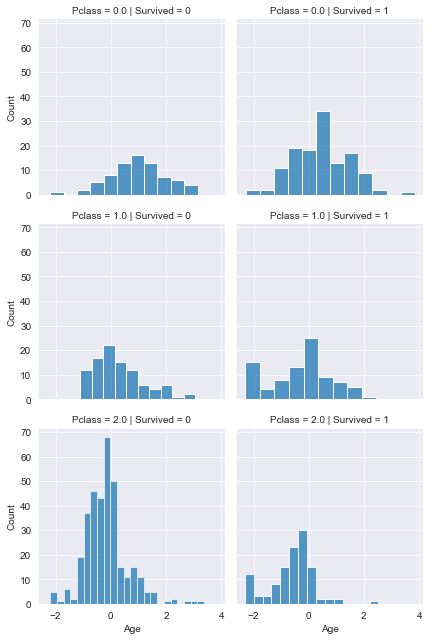

In [175]:
g=sns.FacetGrid(train,col='Survived',row='Pclass')
g.map(sns.histplot,'Age')
g.add_legend()
plt.show()

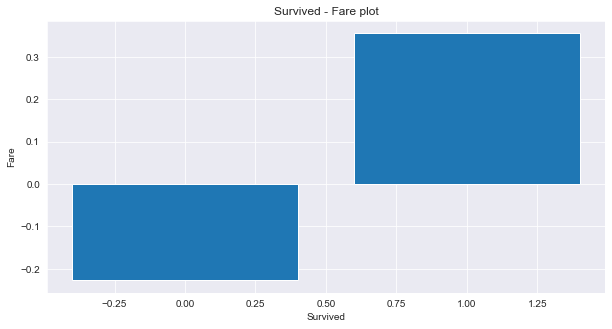

In [176]:
data=train.groupby(by=['Survived'])['Fare'].sum()/train['Survived'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(data.index,data.values)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Survived - Fare plot')
plt.show()

C:\Users\Cerberus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

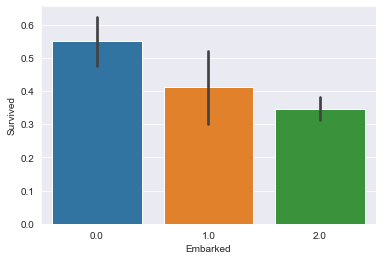

In [177]:
sns.barplot(train['Embarked'],train['Survived'])

C:\Users\Cerberus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


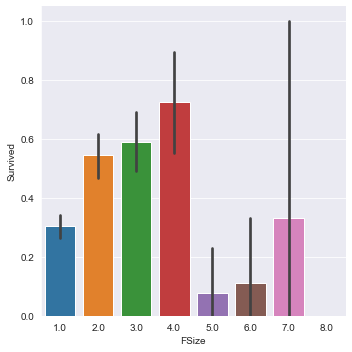

In [178]:
train['FSize']=train['SibSp']+train['Parch']+1
g=sns.factorplot(data=train,y='Survived',x='FSize',kind='bar')
plt.show()

In [179]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FSize
0,0,2.0,"Braund, Mr. Owen Harris",1.0,-0.648565,1.0,0.0,A/5 21171,-0.515108,not defined,2.0,2.0
1,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,0.588579,1.0,0.0,PC 17599,1.042104,C85,0.0,2.0
2,1,2.0,"Heikkinen, Miss. Laina",0.0,-0.339279,0.0,0.0,STON/O2. 3101282,-0.498693,not defined,2.0,1.0
3,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,0.356615,1.0,0.0,113803,0.599908,C123,2.0,2.0
4,0,2.0,"Allen, Mr. William Henry",1.0,0.356615,0.0,0.0,373450,-0.495653,not defined,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1.0,"Montvila, Rev. Juozas",1.0,-0.261957,0.0,0.0,211536,-0.375275,not defined,2.0,1.0
887,1,0.0,"Graham, Miss. Margaret Edith",0.0,-0.880530,0.0,0.0,112053,0.038144,B42,2.0,1.0
888,0,2.0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,-0.277422,1.0,2.0,W./C. 6607,-0.121144,not defined,2.0,4.0
889,1,0.0,"Behr, Mr. Karl Howell",1.0,-0.339279,0.0,0.0,111369,0.038144,C148,0.0,1.0


In [180]:
train['FSize']=train['FSize'].apply(lambda x: 1 if x<=4 else 0)

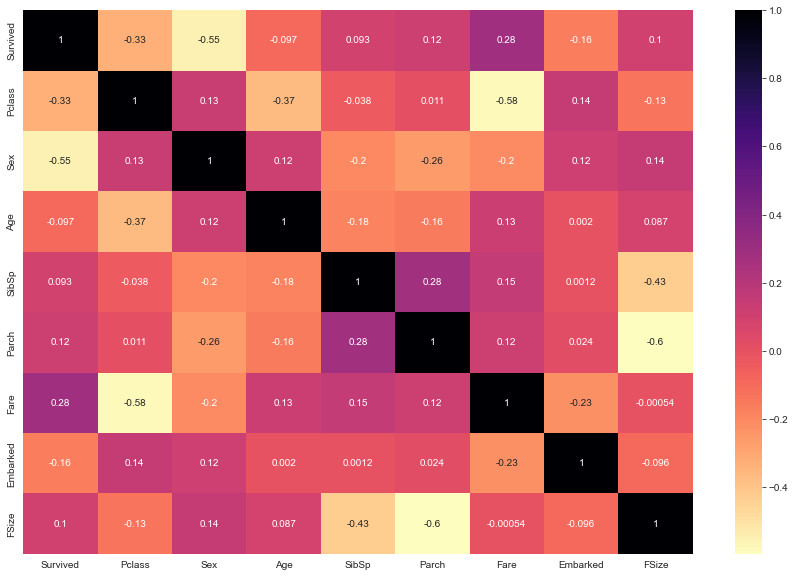

In [181]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.magma_r)
plt.show()

In [182]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FSize
0,0,2.0,"Braund, Mr. Owen Harris",1.0,-0.648565,1.0,0.0,A/5 21171,-0.515108,not defined,2.0,1
1,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,0.588579,1.0,0.0,PC 17599,1.042104,C85,0.0,1
2,1,2.0,"Heikkinen, Miss. Laina",0.0,-0.339279,0.0,0.0,STON/O2. 3101282,-0.498693,not defined,2.0,1
3,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,0.356615,1.0,0.0,113803,0.599908,C123,2.0,1
4,0,2.0,"Allen, Mr. William Henry",1.0,0.356615,0.0,0.0,373450,-0.495653,not defined,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1.0,"Montvila, Rev. Juozas",1.0,-0.261957,0.0,0.0,211536,-0.375275,not defined,2.0,1
887,1,0.0,"Graham, Miss. Margaret Edith",0.0,-0.880530,0.0,0.0,112053,0.038144,B42,2.0,1
888,0,2.0,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,-0.277422,1.0,2.0,W./C. 6607,-0.121144,not defined,2.0,1
889,1,0.0,"Behr, Mr. Karl Howell",1.0,-0.339279,0.0,0.0,111369,0.038144,C148,0.0,1


In [183]:
train['Title']=train['Name'].apply(lambda x:x.split('.')[0].split(',')[-1].strip())

In [184]:
pd.get_dummies(train['Name'].apply(lambda x:x.split('.')[0].split(',')[-1].strip())).columns

Index(['Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss',
       'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess'],
      dtype='object')

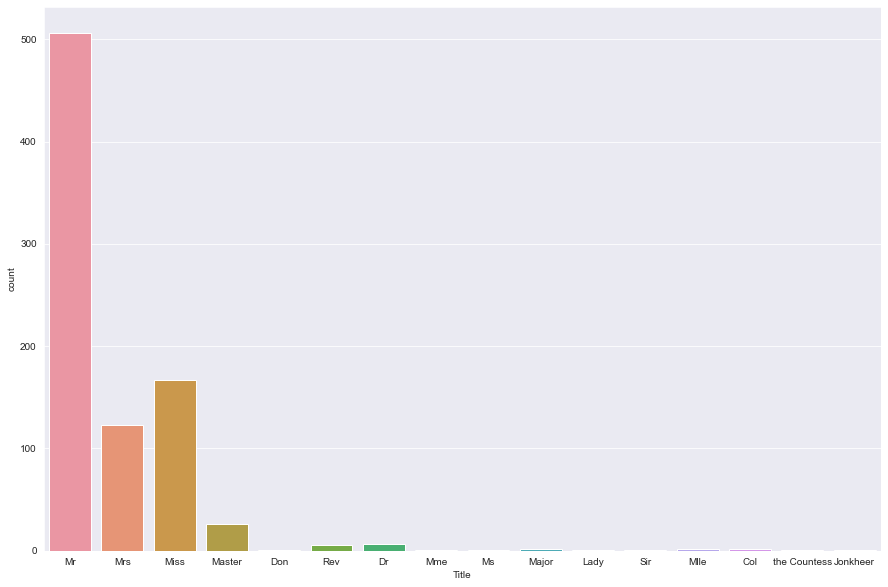

In [185]:
plt.figure(figsize=(15,10))
sns.countplot(x=train['Title'])
plt.show()

In [186]:
train['Title']=train['Title'].replace(train['Title'].unique()[3:],'other')

In [187]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'other'], dtype=object)

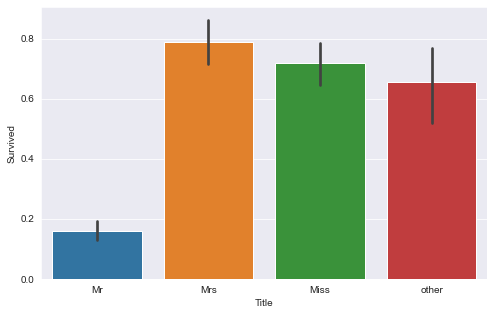

In [188]:
plt.figure(figsize=(8,5))
sns.barplot(x=train['Title'],y=train['Survived'])
plt.show()

In [189]:
train.drop(columns=['Title'],inplace=True)
train.drop(columns=['FSize'],inplace=True)

In [192]:
class FeatureEng(BaseEstimator,TransformerMixin):

    def __init__(self):
        self.unique_title_=None
        self.replace_title=None
        pass

    def fit(self ,X, y=None, **fit_params):
        title=X['Name'].apply(lambda x:x.split('.')[0].split(',')[-1].strip())
        title=title.astype(str)
        self.unique_title_=list(title.unique())
        self.replace_title=list(title.unique()[3:])
        self.replace_title.append('Dona')

    def transform(self,X, y=None):
        # create 'Title' feature
        X['Title']=X['Name'].apply(lambda x:x.split('.')[0].split(',')[-1].strip())
        X['Title']=X['Title'].replace(self.replace_title,'other')
        one_hot_encoding=pd.get_dummies(X['Title'])
        X[one_hot_encoding.columns]=one_hot_encoding.values
        X.drop(columns=['Title'],inplace=True)

        # create 'FSize' feature
        X['FSize']=X['SibSp']+X['Parch']+1
        X['FSize']=X['FSize'].apply(lambda x: 1 if x<=4 else 0)


        #drop 'Ticket' and 'Cabin' features
        X.drop(columns=['Ticket','Name','Cabin'],inplace=True)
        return X

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return  self.transform(X,y)

In [193]:
fe=FeatureEng()
fe.fit_transform(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Miss,Mr,Mrs,other,FSize
0,0,2.0,1.0,-0.648565,1.0,0.0,-0.515108,2.0,0,1,0,0,1
1,1,0.0,0.0,0.588579,1.0,0.0,1.042104,0.0,0,0,1,0,1
2,1,2.0,0.0,-0.339279,0.0,0.0,-0.498693,2.0,1,0,0,0,1
3,1,0.0,0.0,0.356615,1.0,0.0,0.599908,2.0,0,0,1,0,1
4,0,2.0,1.0,0.356615,0.0,0.0,-0.495653,2.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1.0,1.0,-0.261957,0.0,0.0,-0.375275,2.0,0,0,0,1,1
887,1,0.0,0.0,-0.880530,0.0,0.0,0.038144,2.0,1,0,0,0,1
888,0,2.0,0.0,-0.277422,1.0,2.0,-0.121144,2.0,1,0,0,0,1
889,1,0.0,1.0,-0.339279,0.0,0.0,0.038144,0.0,0,1,0,0,1


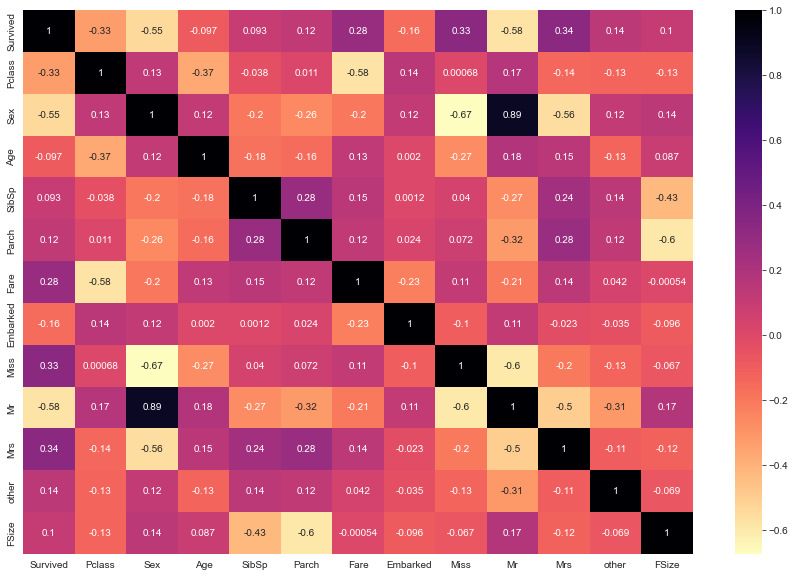

In [194]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.magma_r)
plt.show()

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_val_predict

In [196]:
y_train=train['Survived']
x_train=train.drop(columns='Survived')

In [197]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 848, dtype: int64

In [198]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Miss,Mr,Mrs,other,FSize
0,2.0,1.0,-0.648565,1.0,0.0,-0.515108,2.0,0,1,0,0,1
1,0.0,0.0,0.588579,1.0,0.0,1.042104,0.0,0,0,1,0,1
2,2.0,0.0,-0.339279,0.0,0.0,-0.498693,2.0,1,0,0,0,1
3,0.0,0.0,0.356615,1.0,0.0,0.599908,2.0,0,0,1,0,1
4,2.0,1.0,0.356615,0.0,0.0,-0.495653,2.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,1.0,-0.261957,0.0,0.0,-0.375275,2.0,0,0,0,1,1
887,0.0,0.0,-0.880530,0.0,0.0,0.038144,2.0,1,0,0,0,1
888,2.0,0.0,-0.277422,1.0,2.0,-0.121144,2.0,1,0,0,0,1
889,0.0,1.0,-0.339279,0.0,0.0,0.038144,0.0,0,1,0,0,1


In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
def plot_precision_recall_curve(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'r--',label='precision')
    plt.plot(thresholds,recalls[:-1],'b-',label='recall')
    plt.legend()
    plt.show()

In [201]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,'r--',label='roc')
    plt.plot(fpr,fpr,'b-',label='random classifier')
    plt.legend()
    plt.show()

In [202]:
dt_params={
    'random_state':[42],
    'criterion':['gini','entropy'],
    'min_samples_split':np.arange(2,5,1).astype(np.int8),
    'ccp_alpha':np.arange(0,3,0.5)
}
dt_grid_sv=GridSearchCV(DecisionTreeClassifier(),dt_params,scoring='accuracy',cv=8,n_jobs=-1)
dt_grid_sv.fit(x_train,y_train)
dt_best=dt_grid_sv.best_estimator_
print(f'best score {dt_grid_sv.best_score_}')

best score 0.7818396226415094


In [203]:
dt_scores=cross_val_predict(dt_best,x_train,y_train,cv=8,method='predict_proba')

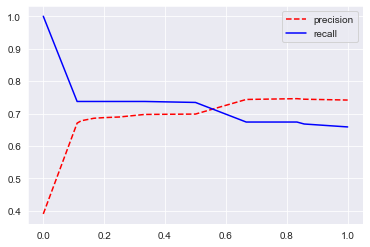

In [204]:
dt_precisions,dt_recalls,dt_thresholds=metrics.precision_recall_curve(y_train,dt_scores[:,1])
plot_precision_recall_curve(dt_precisions,dt_recalls,dt_thresholds)

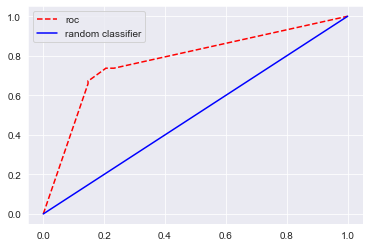

In [205]:
dt_fpr,dt_tpr,_=metrics.roc_curve(y_train,dt_scores[:,1])
plot_roc_curve(dt_fpr,dt_tpr)

In [206]:
# logistic regression
lr_params={
    'random_state':[42],
    'penalty':['l2', 'none'],
    'C':np.arange(0,1,0.1),
    'solver':['newton-cg', 'lbfgs'],
    'max_iter':[3000]
}
lr_grid_sv=GridSearchCV(LogisticRegression(),lr_params,scoring='accuracy',cv=8,n_jobs=-1)
lr_grid_sv.fit(x_train,y_train)
lr_best=lr_grid_sv.best_estimator_
print(f'best score {lr_grid_sv.best_score_}')

best score 0.821933962264151


In [207]:
lr_scores=cross_val_predict(lr_best,x_train,y_train,cv=8,method='predict_proba')

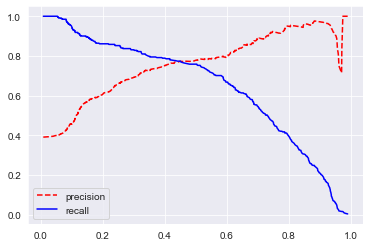

In [208]:
lr_precisions,lr_recalls,lr_thresholds=metrics.precision_recall_curve(y_train,lr_scores[:,1])
plot_precision_recall_curve(lr_precisions,lr_recalls,lr_thresholds)

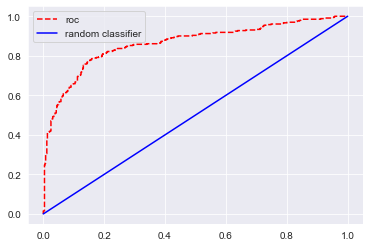

In [209]:
lr_fpr,lr_tpr,_=metrics.roc_curve(y_train,lr_scores[:,1])
plot_roc_curve(lr_fpr,lr_tpr)

In [210]:
# random forest
rf_params = {
    'random_state':[42],
    'criterion':['gini','entropy'],
    'min_samples_split':np.arange(2,5,1).astype(np.int8),
    'ccp_alpha':np.arange(0,3,0.5)
}
rf_grid_sv = GridSearchCV(RandomForestClassifier(), rf_params, scoring='accuracy', cv=8, n_jobs=-1)
rf_grid_sv.fit(x_train, y_train)
rf_best = rf_grid_sv.best_estimator_
print(f'best score {rf_grid_sv.best_score_}')

best score 0.8254716981132075


In [211]:
rf_scores = cross_val_predict(rf_best, x_train, y_train, cv=8, method='predict_proba')

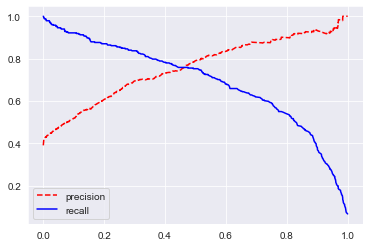

In [212]:
rf_precisions, rf_recalls, rf_thresholds = metrics.precision_recall_curve(y_train, rf_scores[:, 1])
plot_precision_recall_curve(rf_precisions, rf_recalls, rf_thresholds)

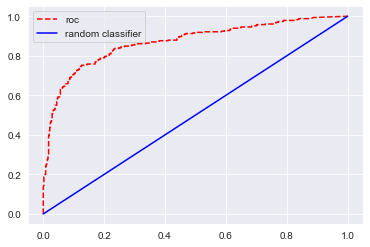

In [213]:
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_train, rf_scores[:, 1])
plot_roc_curve(rf_fpr, rf_tpr)

In [214]:
# SVC
svc_params = {
    'random_state':[42],
    'C':np.arange(0.1,1,0.1),
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':np.arange(1,8,1).astype(np.int8),
    'max_iter':[3000],
}
svc_grid_sv = GridSearchCV(SVC(), svc_params, scoring='accuracy', cv=8, n_jobs=-1)
svc_grid_sv.fit(x_train, y_train)
svc_best = svc_grid_sv.best_estimator_
print(f'best score {svc_grid_sv.best_score_}')

best score 0.8325471698113208


In [215]:
svc_scores = cross_val_predict(svc_best, x_train, y_train, cv=8, method='decision_function')

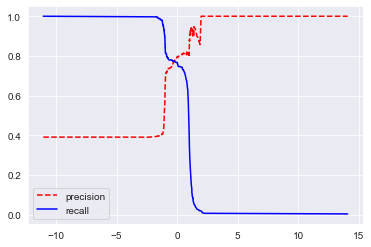

In [216]:
svc_precisions, svc_recalls, svc_thresholds = metrics.precision_recall_curve(y_train, svc_scores)
plot_precision_recall_curve(svc_precisions, svc_recalls, svc_thresholds)

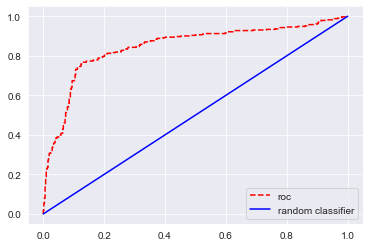

In [217]:
svc_fpr, svc_tpr, _ = metrics.roc_curve(y_train, svc_scores)
plot_roc_curve(svc_fpr, svc_tpr)

In [218]:
# mlp
mlp_params = {
    'hidden_layer_sizes':[(2,6,3),(5,10),(5,5),(4,3)],
    'random_state':[42],
    'activation':['logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha':np.logspace(0.001,0.1,3),
    'early_stopping':[True],
    'learning_rate':['adaptive'],
    'verbose':[True],
    'max_iter':[3000],
}
mlp_grid_sv = GridSearchCV(MLPClassifier(), mlp_params, scoring='accuracy', cv=8, n_jobs=-1)
mlp_grid_sv.fit(x_train, y_train)
mlp_best = mlp_grid_sv.best_estimator_
print(f'best score {mlp_grid_sv.best_score_}')

best score 0.821933962264151


In [219]:
mlp_scores = cross_val_predict(mlp_best, x_train, y_train, cv=8, method='predict_proba')

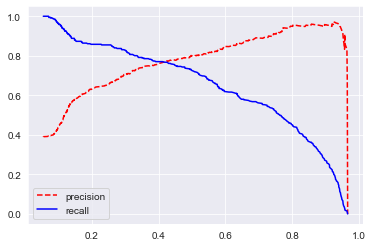

In [220]:
mlp_precisions, mlp_recalls, mlp_thresholds = metrics.precision_recall_curve(y_train, mlp_scores[:,1])
plot_precision_recall_curve(mlp_precisions, mlp_recalls, mlp_thresholds)

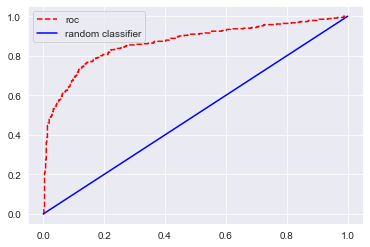

In [221]:
mlp_fpr, mlp_tpr, _ = metrics.roc_curve(y_train, mlp_scores[:,1])
plot_roc_curve(mlp_fpr, mlp_tpr)

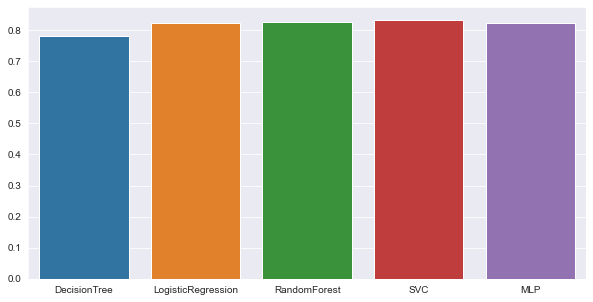

In [222]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=['DecisionTree','LogisticRegression','RandomForest','SVC','MLP'],
    y=[dt_grid_sv.best_score_,lr_grid_sv.best_score_,rf_grid_sv.best_score_,svc_grid_sv.best_score_,mlp_grid_sv.best_score_]
)
plt.show()

In [223]:
result_df=pd.DataFrame(
    columns=['name','model','score'],
)
result_df['name']=['DecisionTree','LogisticRegression','RandomForest','SVC','MLP']
result_df['model']=[dt_grid_sv.best_estimator_,lr_grid_sv.best_estimator_,rf_grid_sv.best_estimator_,svc_grid_sv.best_estimator_,mlp_grid_sv.best_estimator_]
result_df['score']=[dt_grid_sv.best_score_,lr_grid_sv.best_score_,rf_grid_sv.best_score_,svc_grid_sv.best_score_,mlp_grid_sv.best_score_]

In [224]:
result_df

,name,model,score
0,DecisionTree,"DecisionTreeClassifier(min_samples_split=3, ra...",0.781840
1,LogisticRegression,"LogisticRegression(C=0.4, max_iter=3000, rando...",0.821934
2,RandomForest,"(DecisionTreeClassifier(max_features='sqrt', m...",0.825472
3,SVC,"SVC(C=0.6, kernel='poly', max_iter=3000, rando...",0.832547
4,MLP,"MLPClassifier(activation='logistic', alpha=1.2...",0.821934


In [226]:
result_df.sort_values(by='score',ascending=False,inplace=True)
result_df

,name,model,score
3,SVC,"SVC(C=0.6, kernel='poly', max_iter=3000, rando...",0.832547
2,RandomForest,"(DecisionTreeClassifier(max_features='sqrt', m...",0.825472
1,LogisticRegression,"LogisticRegression(C=0.4, max_iter=3000, rando...",0.821934
4,MLP,"MLPClassifier(activation='logistic', alpha=1.2...",0.821934
0,DecisionTree,"DecisionTreeClassifier(min_samples_split=3, ra...",0.781840


In [89]:
from sklearn.pipeline import Pipeline

In [227]:
test=imputer.transform(test)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,not defined,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,not defined,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,not defined,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,not defined,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,not defined,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.1,0,0,A.5. 3236,8.05,not defined,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,not defined,S
416,3,"Ware, Mr. Frederick",male,30.1,0,0,359309,8.05,not defined,S


In [228]:
test[numerical_feature_names]=scaler.transform(test[numerical_feature_names])
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,0.317954,0,0,330911,-0.501023,not defined,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.284473,1,0,363272,-0.521188,not defined,S
2,2,"Myles, Mr. Thomas Francis",male,2.444296,0,0,240276,-0.455831,not defined,Q
3,3,"Wirz, Mr. Albert",male,-0.261957,0,0,315154,-0.480758,not defined,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.648565,1,1,3101298,-0.392602,not defined,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,-0.022261,0,0,A.5. 3236,-0.495653,not defined,S
414,1,"Oliva y Ocana, Dona. Fermina",female,0.665901,0,0,PC 17758,1.956897,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,0.627240,0,0,SOTON/O.Q. 3101262,-0.515108,not defined,S
416,3,"Ware, Mr. Frederick",male,-0.022261,0,0,359309,-0.495653,not defined,S


In [229]:
test[categorical_feature_names]=encoder.fit_transform(test[categorical_feature_names])
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2.0,"Kelly, Mr. James",1.0,0.317954,0.0,0.0,330911,-0.501023,not defined,1.0
1,2.0,"Wilkes, Mrs. James (Ellen Needs)",0.0,1.284473,1.0,0.0,363272,-0.521188,not defined,2.0
2,1.0,"Myles, Mr. Thomas Francis",1.0,2.444296,0.0,0.0,240276,-0.455831,not defined,1.0
3,2.0,"Wirz, Mr. Albert",1.0,-0.261957,0.0,0.0,315154,-0.480758,not defined,2.0
4,2.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0.0,-0.648565,1.0,1.0,3101298,-0.392602,not defined,2.0
...,...,...,...,...,...,...,...,...,...,...
413,2.0,"Spector, Mr. Woolf",1.0,-0.022261,0.0,0.0,A.5. 3236,-0.495653,not defined,2.0
414,0.0,"Oliva y Ocana, Dona. Fermina",0.0,0.665901,0.0,0.0,PC 17758,1.956897,C105,0.0
415,2.0,"Saether, Mr. Simon Sivertsen",1.0,0.627240,0.0,0.0,SOTON/O.Q. 3101262,-0.515108,not defined,2.0
416,2.0,"Ware, Mr. Frederick",1.0,-0.022261,0.0,0.0,359309,-0.495653,not defined,2.0


In [230]:
test=fe.transform(test)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Miss,Mr,Mrs,other,FSize
0,2.0,1.0,0.317954,0.0,0.0,-0.501023,1.0,0,1,0,0,1
1,2.0,0.0,1.284473,1.0,0.0,-0.521188,2.0,0,0,1,0,1
2,1.0,1.0,2.444296,0.0,0.0,-0.455831,1.0,0,1,0,0,1
3,2.0,1.0,-0.261957,0.0,0.0,-0.480758,2.0,0,1,0,0,1
4,2.0,0.0,-0.648565,1.0,1.0,-0.392602,2.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,2.0,1.0,-0.022261,0.0,0.0,-0.495653,2.0,0,1,0,0,1
414,0.0,0.0,0.665901,0.0,0.0,1.956897,0.0,0,0,0,1,1
415,2.0,1.0,0.627240,0.0,0.0,-0.515108,2.0,0,1,0,0,1
416,2.0,1.0,-0.022261,0.0,0.0,-0.495653,2.0,0,1,0,0,1


In [231]:
from sklearn.ensemble import VotingClassifier

In [232]:
voting_cls=VotingClassifier(
    estimators = [(result_df.loc[0,'name'],result_df.loc[0,'model']),
                  (result_df.loc[1,'name'],result_df.loc[1,'model']),
                  (result_df.loc[2,'name'],result_df.loc[2,'model'])],
    voting = "soft", n_jobs = -1
)

In [234]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Miss,Mr,Mrs,other,FSize
0,2.0,1.0,0.317954,0.0,0.0,-0.501023,1.0,0,1,0,0,1
1,2.0,0.0,1.284473,1.0,0.0,-0.521188,2.0,0,0,1,0,1
2,1.0,1.0,2.444296,0.0,0.0,-0.455831,1.0,0,1,0,0,1
3,2.0,1.0,-0.261957,0.0,0.0,-0.480758,2.0,0,1,0,0,1
4,2.0,0.0,-0.648565,1.0,1.0,-0.392602,2.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,2.0,1.0,-0.022261,0.0,0.0,-0.495653,2.0,0,1,0,0,1
414,0.0,0.0,0.665901,0.0,0.0,1.956897,0.0,0,0,0,1,1
415,2.0,1.0,0.627240,0.0,0.0,-0.515108,2.0,0,1,0,0,1
416,2.0,1.0,-0.022261,0.0,0.0,-0.495653,2.0,0,1,0,0,1


In [235]:
voting_cls.fit(x_train,y_train)
results=voting_cls.predict(test)

In [236]:
output=pd.DataFrame(columns=['PassengerId','Survived'])
output['PassengerId']=test_passenger_id
output['Survived']=results
output.to_csv('results.csv',index=False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
